<a href="https://colab.research.google.com/github/EduHdzVillasana/Technical-Test-Torre/blob/main/Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Technical Test Torre
----
*Eduardo Alan Hernandez Villasana*

## Data Extraction

The data was extracted from [Data World](https://data.world/promptcloud/50000-job-board-records-from-reed-uk).

Reed is one of the top employment agency based in the United Kingdom. This data set contains 50000 records of latest job postings on Reed UK.

This data was extracted on March 13th 2018 and contains job postings from last 15 days. Following data fields are included in the dataset:

* category
* city
* state
* company name
* job title
* job description
* job requirement
* job type
* salary offered
* posting date

In [1]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_url = "https://query.data.world/s/rut5pr5nm5i4onzlfp6xjgcsw3rvu4"
df_raw = pd.read_csv(data_url)

## Data Exploration

In [3]:
df_raw.sample(5)

,category,city,company_name,geo,job_board,job_description,job_requirements,job_title,job_type,post_date,salary_offered,state
45792,other jobs,Zone 1,Hollyfield Personnel,uk,reed,Apply now Our client is looking for a Schedul...,NaN,Scheduler - Burntwood - Temp on going,"Temporary, full-time",3/6/2018,£8.50 - £9.00 per hour,Staffordshire
26060,science jobs,france,Helix Recruitment Ltd,uk,reed,"Apply now As EMEA Product Manager, you will b...",Required skills Cell Biology ELISA Immunology...,EMEA Product Manager - Immunoassay,"Permanent, full-time",3/6/2018,Competitive salary,France
32219,marketing jobs,West London,VTCT,uk,reed,Apply now Job Title: Marketing Intelligence E...,Required skills Marketing 'Marketing Executiv...,Marketing Intelligence Executive,"Permanent, full-time",2/27/2018,"£29,000 per annum",London
30119,law jobs,Doncaster,CRA Consulting,uk,reed,Apply now We are recruiting on behalf of lead...,NaN,Commercial Litigation Paralegal,"Permanent, full-time",3/7/2018,"£18,000 - £24,000 per annum",South Yorkshire
17382,sales jobs,London,Genesis Associates (UK) Limited,uk,reed,Apply now Sale Consultant/ New Business/ Acco...,Required skills sales executive account manag...,Sales Consultant/ New Business/ Account Manage...,"Permanent, full-time",3/4/2018,"£40,000 - £45,000 per annum",South East England


In [4]:
df_raw.dtypes

category            object
city                object
company_name        object
geo                 object
job_board           object
job_description     object
job_requirements    object
job_title           object
job_type            object
post_date           object
salary_offered      object
state               object
dtype: object

In [5]:
df_raw.isnull().sum()

category                0
city                    0
company_name            0
geo                     0
job_board               0
job_description         0
job_requirements    29452
job_title               0
job_type                0
post_date               0
salary_offered          0
state                  20
dtype: int64

In [6]:
df_raw.shape

(50000, 12)

In [7]:
df_raw.describe()

,category,city,company_name,geo,job_board,job_description,job_requirements,job_title,job_type,post_date,salary_offered,state
count,50000,50000,50000,50000,50000,50000,20548,50000,50000,50000,50000,49980
unique,37,2918,5166,1,1,42057,14887,29155,9,66,7345,167
top,health jobs,London,Hays Specialist Recruitment Limited,uk,reed,Apply on employer's website Add an annual tur...,Required skills Recruitment,Administrator,"Permanent, full-time",3/7/2018,Salary negotiable,London
freq,1930,4349,1830,50000,50000,85,123,162,36864,8472,4539,5900


In [8]:
df_raw["city"].sort_values().unique()[[937,1012]]

array(['FRANKFURT', 'Frankfurt'], dtype=object)

In [9]:
df_raw["job_type"].unique()

array(['Permanent, full-time', 'Permanent, full-time or part-time',
       'Permanent, part-time', 'Contract, full-time',
       'Temporary, part-time', 'Temporary, full-time or part-time',
       'Temporary, full-time', 'Contract, full-time or part-time',
       'Contract, part-time'], dtype=object)

## Data Cleaning
* The `geo` and `job_board` columns will be dropped because they have only one unique value in all rows.
* Transform to lower case the cities and states because some cities or states are repeated but some with uper case or lower case.
* Get kew words in `job_requirements` to get a list of requirements.

### Dropping unnecessary columns

In [10]:
df = df_raw.drop(columns = ["geo","job_board"], axis = 1)

### Transforming string columns to lower case.

In [11]:
df["city"] = df["city"].str.lower()
df["state"] = df["state"].str.lower()
df["job_requirements"] = df["job_requirements"].str.lower()
df["job_title"] = df["job_title"].str.lower()
df["company_name"] = df["company_name"].str.lower()
df["category"] = df["category"].str.lower()

In [12]:
len(df[df["salary_offered"] == " Salary not specified "])

317

In [13]:
df["salary_offered"] = df["salary_offered"].str.strip()

In [14]:
len(df[df["salary_offered"] == "Salary not specified"])

317

### Getting key words of `job_requirements` 

In [15]:
df["job_requirements"].sample(3)

30216                                                  NaN
12184                                                  NaN
2209      required skills hr recruitment retail hr advi...
Name: job_requirements, dtype: object

"required skills* is repeated in all non NaN rows

In [16]:
df["job_requirements"] = df["job_requirements"].str.replace("required skills ","")

In [17]:
df["job_requirements"].sample(5)

22609     global procurement purchasing buyer 
37280                                      NaN
34035                                      NaN
47066                                      NaN
10966                                      NaN
Name: job_requirements, dtype: object

In [18]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
import re
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [19]:
df["job_requirements"] = df["job_requirements"].fillna("Unrequirement")

In [20]:
df["job_requirements"].sample(5)

7828      autism communication skills learning disabili...
34893                                        Unrequirement
36339                                        Unrequirement
42822     ecommerce front end javascript node react sin...
26662                                     finance payroll 
Name: job_requirements, dtype: object

In [21]:
df["job_requirements"] = df["job_requirements"].str.lower()
df["job_requirements"] = df["job_requirements"].str.strip()
df["job_requirements"] = df["job_requirements"].str.replace('[^\w\s]', '')
df["job_requirements"] = df["job_requirements"].str.replace('\d', '')
df["job_requirements"] = df["job_requirements"].str.replace('\\n', '')

In [22]:
df["job_requirements"] = df["job_requirements"].apply(nltk.word_tokenize)

In [23]:
df["job_requirements"].sample(3)

35553                                        [recruitment]
38405    [recruitment, sales, advisor, consultant, busi...
48302    [buying, category, procurement, purchase, purc...
Name: job_requirements, dtype: object

In [24]:
english_stop_words = stopwords.words('english')
df["job_requirements"] = df["job_requirements"].apply(lambda s: [word for word in s if word not in english_stop_words])

In [25]:
df["job_requirements"].sample(10)

15177                                      [unrequirement]
17126                   [apache, linux, mysql, networking]
2327                                       [unrequirement]
12202                                      [unrequirement]
15287    [aca, acca, accounts, assistant, part, qualifi...
1500                                       [unrequirement]
46449    [budgets, leadership, management, project, man...
48538               [analytical, glp, gmp, reporting, cro]
40374                                      [unrequirement]
29646                                      [unrequirement]
Name: job_requirements, dtype: object

In [41]:
df["id"] = df.index

In [39]:
df.describe(include="object")

,category,city,company_name,job_description,job_requirements,job_title,job_type,post_date,salary_offered,state
count,50000,50000,50000,50000,50000,50000,50000,50000,50000,49980
unique,37,2874,5162,42057,14786,28702,9,66,7345,163
top,health jobs,london,hays specialist recruitment limited,Apply on employer's website Add an annual tur...,[unrequirement],administrator,"Permanent, full-time",3/7/2018,Salary negotiable,london
freq,1930,4349,1830,85,29452,162,36864,8472,4539,5900


In [44]:
df.head(3)

,category,city,company_name,job_description,job_requirements,job_title,job_type,post_date,salary_offered,state,id
0,catering jobs,chudleigh,haulfryn group,Apply now New opportunity not to be missed! H...,[unrequirement],commis chef,"Permanent, full-time",3/12/2018,"£18,323 per annum",devon,0
1,law jobs,swindon,reed,Apply now This role requires an experienced s...,[unrequirement],corporate legal secretary,"Permanent, full-time",3/8/2018,"£18,000 - £22,000 per annum",wiltshire,1
2,factory jobs,norfolk,swanstaff recruitment ltd,Apply now Job Title: Warehouse personLocation...,[unrequirement],warehouse person,"Permanent, full-time",2/27/2018,Salary not specified,east anglia,2


In [42]:
df_cleaned = df.copy()

## Preparing DataFrame for the Graph Database

In [43]:
df_cleaned.columns

Index(['category', 'city', 'company_name', 'job_description',
       'job_requirements', 'job_title', 'job_type', 'post_date',
       'salary_offered', 'state', 'id'],
      dtype='object')

In [55]:
df_celaned = df_cleaned.rename(columns = {"company_name":"company","job_description":"description","job_requirements":"requirements", "job_title":"title","job_type":"type","salary_offered":"salary"})

In [56]:
df_celaned.columns

Index(['category', 'city', 'company', 'description', 'requirements', 'title',
       'type', 'post_date', 'salary', 'state', 'id'],
      dtype='object')

### Preparing `category` nodes

In [57]:
category = pd.DataFrame(df_celaned[["category"]]).explode("category").drop_duplicates(subset=["category"])
category.size

37

### Preparing `city` nodes

In [58]:
city = pd.DataFrame(df_celaned[["city"]]).explode("city").drop_duplicates(subset=["city"])
city.size

2874

### Preparing `company` nodes

In [59]:
company = pd.DataFrame(df_celaned[["company"]]).explode("company").drop_duplicates(subset=["company"])
company.size

5162

### Preparing `requirement` nodes

In [60]:
requirements = pd.DataFrame(df_celaned[["requirements"]]).explode("requirements").drop_duplicates(subset=["requirements"])
requirements.size

7761

### Preparing `title` nodes

In [54]:
title = pd.DataFrame(df_celaned[["title"]]).explode("title").drop_duplicates(subset=["title"])
title.size

28702

### Preparing `type` nodes

In [65]:
type_ = pd.DataFrame(df_celaned[["type"]]).explode("type").drop_duplicates(subset=["type"])
type_.size

9

### Preparing `state` nodes

In [63]:
state = pd.DataFrame(df_celaned[["state"]]).explode("state").drop_duplicates(subset=["state"])
state.size

164

### Preparing `salary` nodes

In [64]:
salary = pd.DataFrame(df_celaned[["salary"]]).explode("salary").drop_duplicates(subset=["salary"])
salary.size

7345

## Language processing

In [26]:
tokenized = df["job_requirements"]

In [27]:
tokenized.sample(5)

3343     [management, parts, ordering, mechanic, servic...
28381                                      [unrequirement]
41723                                      [unrequirement]
19766    [sales, business, development, solar, pv, tier...
34487                                      [unrequirement]
Name: job_requirements, dtype: object

In [28]:
all_words = tokenized.sum()

In [29]:
english_stop_words = stopwords.words('english')
all_words_except_stop_words = [word for word in all_words if word not in english_stop_words]

In [30]:
len(all_words_except_stop_words)

180812

In [31]:
freq_dist = nltk.FreqDist(all_words_except_stop_words)
most_common_20 = np.array(list(map(lambda x: list(x), freq_dist.most_common(20))))
y = np.array(most_common_20[:,1], dtype=int)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


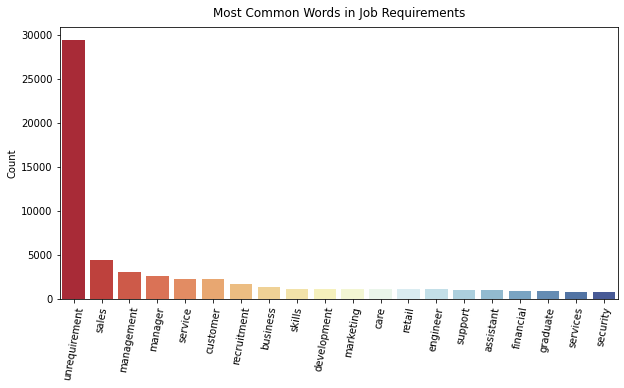

In [32]:
fig = plt.figure(figsize=(10,5  ))
ax = fig.add_subplot()

sns.barplot(most_common_20[:, 0], y, ax=ax, palette='RdYlBu');
ax.set_title('Most Common Words in Job Requirements', pad=10)
ax.set_ylabel('Count')
ax.tick_params(axis='x', rotation=80)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


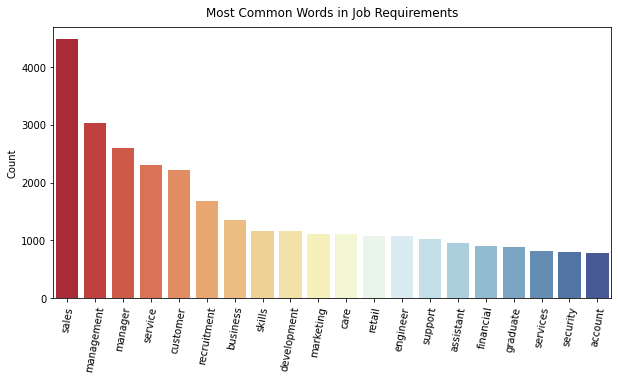

In [33]:
freq_dist = nltk.FreqDist(all_words_except_stop_words)
most_common_20 = np.array(list(map(lambda x: list(x), freq_dist.most_common(21))))
y = np.array(most_common_20[1:,1], dtype=int)
fig = plt.figure(figsize=(10,5  ))
ax = fig.add_subplot()

sns.barplot(most_common_20[1:, 0], y, ax=ax, palette='RdYlBu');
ax.set_title('Most Common Words in Job Requirements', pad=10)
ax.set_ylabel('Count')
ax.tick_params(axis='x', rotation=80)